In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score



#from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
features = df
features = pd.get_dummies(features)
features.drop(["Class"], axis=1)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [13]:
targets = df[["Class"]]
targets

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [14]:
#No null values in feature matrix
features.isnull().values.any()

False

In [15]:
#Check variance (important for latter analysis with PCA)

variance = features.var()
print("Variance: \n" + str(variance) + "\n")

"""
mean = features.mean()
print("Mean: \n" + str(mean) + "\n")
"""

mean = features.median()
print("Median: \n" + str(mean) + "\n")


print(features.describe())

Variance: 
Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

Median: 
Time      84692.000000
V1            0.018109
V2            0.065486
V3            0.179846
V4           -0.019847
V5           -0.054336
V6           -0.274187
V7            0.040103
V8            0.022358
V9           -0.051429
V10          -0.09291

In [51]:
#Scale features

gauss_scale = StandardScaler()
standard_features = gauss_scale.fit_transform(features)
standard_features


array([[-1.99658302, -0.69424232, -0.04407492, ..., -0.06378115,
         0.24496426, -0.04159898],
       [-1.99658302,  0.60849633,  0.16117592, ...,  0.04460752,
        -0.34247454, -0.04159898],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.18102083,
         1.16068593, -0.04159898],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ..., -0.0804672 ,
        -0.0818393 , -0.04159898],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.31668678,
        -0.31324853, -0.04159898],
       [ 1.64205773, -0.27233093, -0.11489898, ...,  0.04134999,
         0.51435531, -0.04159898]])

In [20]:
subset_percentage = int(len(features)*0.05)

features_subset = features.head(subset_percentage)
features_subset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14235,25294.0,1.127621,-0.108604,0.597478,0.894770,-0.652385,-0.449184,-0.148746,0.045586,0.619049,...,-0.185206,-0.420534,0.080439,0.412661,0.289759,0.280252,-0.017030,0.013640,26.23,0
14236,25294.0,-1.190538,1.008945,2.064838,1.518023,0.271503,0.315231,1.314812,-0.515129,-0.047245,...,0.000499,0.431860,-0.203959,0.405325,-0.270933,-0.256917,-0.813185,-0.281750,75.08,0
14237,25295.0,-0.623852,0.572964,3.292531,2.181772,-0.380067,0.821996,-0.079450,0.317188,-0.097410,...,-0.008364,0.345442,-0.206268,0.529692,-0.217127,-0.062394,-0.017909,-0.100089,1.52,0
14238,25297.0,0.744290,-1.536171,0.337662,0.129199,-1.643995,-0.688488,-0.317656,-0.169936,-0.597298,...,-0.008592,-0.266995,-0.288706,0.409054,0.185452,0.630259,-0.067308,0.073011,323.50,0


In [21]:
targets_small = targets.head(subset_percentage)

In [22]:
gauss_scale = StandardScaler()

features_scaled = gauss_scale.fit_transform(features_subset)
features_scaled

array([[-1.31202247, -0.64592711, -0.25596912, ..., -0.092163  ,
         0.48371538, -0.06504853],
       [-1.31202247,  0.82262066, -0.01444623, ...,  0.04794708,
        -0.3461036 , -0.06504853],
       [-1.31189657, -0.64509083, -1.15910559, ..., -0.24371445,
         1.77726836, -0.06504853],
       ...,
       [ 1.87257186, -0.22236608,  0.20418901, ..., -0.40168238,
        -0.35271143, -0.06504853],
       [ 1.87282366,  0.56503435, -1.29878068, ...,  0.27620989,
         1.46574032, -0.06504853],
       [ 1.87282366, -0.72232242, -0.3822294 , ..., -0.23072796,
        -0.06027267, -0.06504853]])

In [23]:
def visualize_pca(pca, pca_result):
    
    # Plot explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
    plt.step(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Number of Principal Components')
    plt.xticks(range(1, num_components + 1))
    plt.show()
    
    # Plot 2D or 3D scatter plot based on number of components
    if num_components == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('2D PCA Visualization')
        plt.show()
    elif num_components == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        ax.set_title('3D PCA Visualization')
        plt.show()
    else:
        print("Can only visualize 2D or 3D PCA results.")


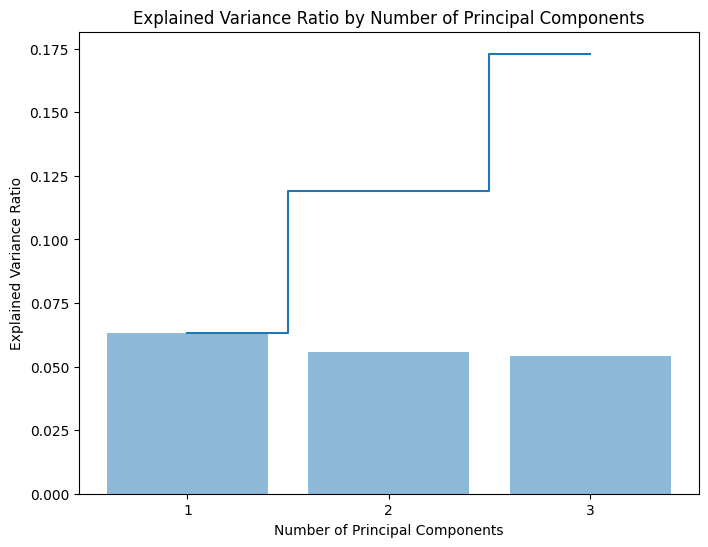

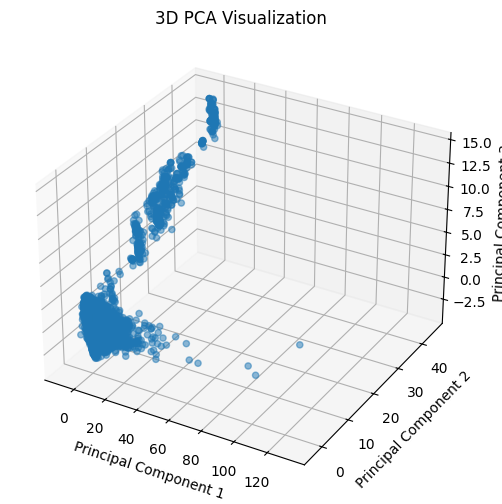

In [89]:
num_components = 3

pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(standard_features)

visualize_pca(pca, pca_result)

In [26]:
type(pca_result)
print(pca_result)

[[-0.15512293 -2.90659207 -0.77954542]
 [ 0.04922411 -2.09315674  0.46125596]
 [ 0.13215035 -2.85493334 -1.391067  ]
 ...
 [-0.12768609 -0.62258343 -0.6353863 ]
 [-0.18707177 -0.67834315 -0.9414573 ]
 [ 0.11277242 -1.22954968 -0.57682634]]


[0.06317253 0.11884742 0.17303472 0.20529278 0.23755085 0.26980891
 0.30206698 0.33432504 0.3665831  0.39884117 0.43109923 0.4633573
 0.49561536 0.52787343 0.56013149 0.59238956 0.62464762 0.65690569
 0.68916375 0.72142181 0.75367988 0.78593794 0.81819601 0.85045407
 0.88271214 0.9149702  0.94722827 0.97948633 0.98967706 0.99864063
 1.        ]


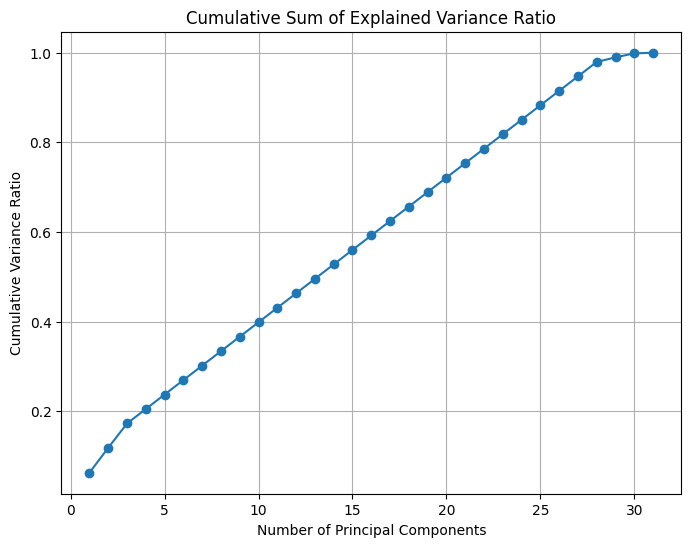

In [90]:
def plot_cumulative_variance(features):
    pca = PCA()
    pca.fit(features)

    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    print(cumulative_variance_ratio)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Ratio')
    plt.title('Cumulative Sum of Explained Variance Ratio')
    plt.grid(True)
    plt.show()

# Call the function with your scaled feature matrix
plot_cumulative_variance(standard_features)

In [74]:
def visualize_kernel_pca(kpca_result):
    # Plot 2D Kernel PCA Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(kpca_result[:, 0], kpca_result[:, 1], alpha=0.5)
    plt.xlabel('Kernel Principal Component 1')
    plt.ylabel('Kernel Principal Component 2')
    plt.title('Kernel PCA Visualization')
    plt.show()

In [75]:
num_components = 2

kpca = KernelPCA(n_components=num_components, kernel='linear')  # You can choose different kernels ('linear', 'poly', 'rbf', etc.)
kpca_result = kpca.fit_transform(standard_features)

#visualize_kernel_pca(kpca_result)

MemoryError: Unable to allocate 295. TiB for an array with shape (6362620, 6362620) and data type float64

In [39]:

X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets_small, test_size=0.33, random_state=42)

num_components = 6
pca = PCA(n_components=num_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

principal_components = pca.components_
#principal_components

array([[ 3.04699046e-02, -1.82516132e-01,  1.74791968e-01,
        -3.31655668e-01,  1.85978099e-01, -1.72459804e-01,
        -9.06129213e-02, -2.96848191e-01,  1.00765660e-01,
        -1.46653383e-01, -2.59936989e-01,  2.19947683e-01,
        -2.22838259e-01, -1.94116783e-02, -3.12339535e-01,
        -7.38897530e-04, -2.73056080e-01, -3.07624422e-01,
        -1.76251414e-01,  3.97407820e-02,  5.93859623e-02,
         1.73490533e-02, -1.99489751e-04, -3.82660591e-02,
        -2.78973762e-02, -2.12094718e-02,  4.07043865e-03,
         1.64028433e-01,  1.72996400e-02,  7.73575538e-03,
         3.65676256e-01],
       [ 5.21408977e-01,  4.49942192e-02, -5.06831780e-02,
        -3.07001388e-02,  7.57085914e-02, -7.46877351e-02,
         8.31153916e-03, -1.31565416e-01,  4.53342950e-02,
         3.20176298e-01, -1.22965847e-01,  2.22976858e-01,
        -3.91283633e-01,  4.05464553e-01,  2.76889688e-01,
        -2.33421756e-01,  6.55444504e-02,  1.92349598e-01,
         8.50876555e-02, -8.53

In [91]:
X_train, X_test, y_train, y_test = train_test_split(standard_features, targets, test_size=0.33, random_state=42)


In [92]:
clf = SVC(kernel='rbf')

In [93]:
clf.fit(X_train, y_train.ravel())

SVC()

In [85]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9997446455360848

In [86]:
class_report = classification_report(y_test, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     93838\n           1       1.00      0.84      0.91       149\n\n    accuracy                           1.00     93987\n   macro avg       1.00      0.92      0.96     93987\nweighted avg       1.00      1.00      1.00     93987\n'

In [87]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
cv_scores

c:\users\isaak\desktop\csm_files\spring_2024\ml\final_project\employee_counts\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\isaak\desktop\csm_files\spring_2024\ml\final_project\employee_counts\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\isaak\desktop\csm_files\spring_2024\ml\final_project\employee_counts\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\isaak\desktop\csm_file

array([0.99971177, 0.99971177, 0.99973797, 0.99976418, 0.99963316])

In [ ]:
cols = data.columns
cols


In [ ]:
query = """
        SELECT MAX(amount), MIN(amount) FROM data
        """


In [ ]:
df = sqldf(query)
df

In [ ]:

df['areaname_numeric'] = pd.factorize(df['areaname'])[0]
df['income'] = pd.to_numeric(df['income'])

# Drop the original categorical column if needed
#df = df.drop('areaname', axis=1)

# Display the resulting DataFrame
df

In [ ]:
cols = df.columns
cols

In [ ]:


# Add labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Chart Example')
plt.plot(df['periodyear'], df['population'])
# Show the plot
plt.show()

In [ ]:


# Assuming 'df' is your DataFrame with the provided data

# Select relevant features and target variable
features = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
target = df['isFraud']

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))

h = .02  # step size in the mesh
x_min, x_max = features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1
y_min, y_max = features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the data points
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary and Dimensionality of the Data')
plt.show()
